Name    - VANSHIKA PARASHAR     
Roll no - R177219209                  
Sap id  - 500076703  
Name    - SHREY CHAUHAN

Roll no - R1772192174                 
Sap id  - 500076344

**Importing packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING THE DATASET**

In [ ]:
df=pd.read_csv("/content/winequality-red.csv",sep=';')
print(df)
df.head()

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Visualizing quality distribution over the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


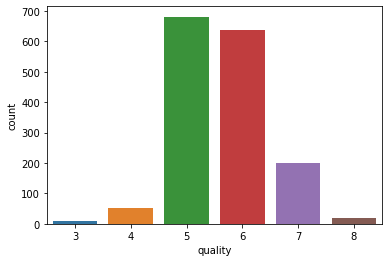

In [ ]:
sns.countplot(df["quality"],data=df)
plt.show()

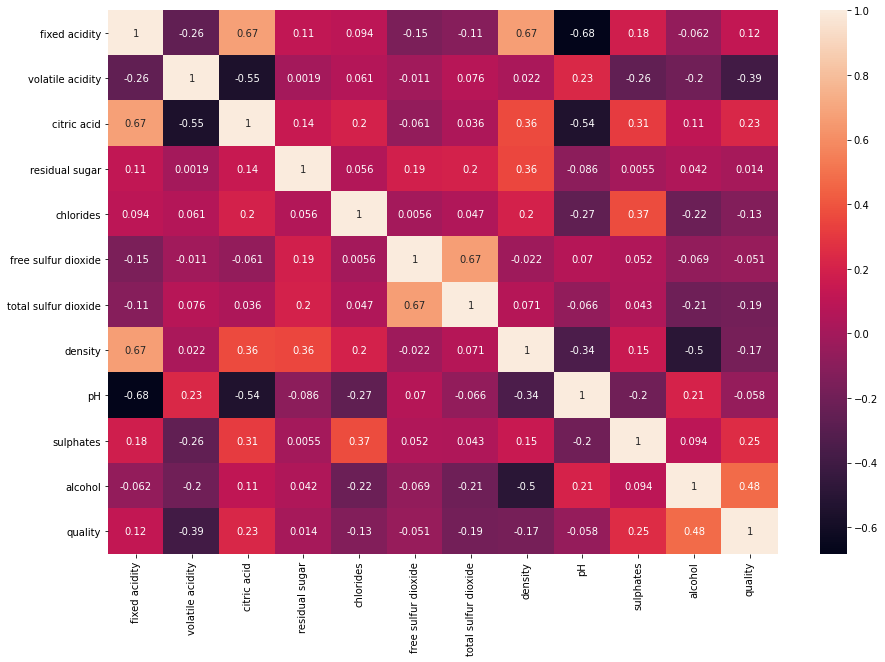

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

**Modifying the quality parameter into low medium and high**


In [ ]:
lst=df["quality"].values
quality_mod = []
for v in lst:
  if v < 5:
    quality_mod.append("LOW")
  elif  v > 6:
      quality_mod.append("High")
  else:
         quality_mod.append("Medium")


In [ ]:
from sklearn.preprocessing import LabelEncoder
quality_mod=pd.DataFrame(data=quality_mod, columns=["category"])
data= pd.concat([df, quality_mod], axis=1)
data.drop(columns="quality",axis=1, inplace=True)
X = data.iloc[: , :-1].values
y = data.iloc[: , -1].values
le = LabelEncoder()
y = le.fit_transform(y)

**Splitting dataset into test and train set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25,random_state=0)

**First Random Forest model is applied**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Accuracy Random Forest:", rf.score(X_test, y_test) )

Accuracy Random Forest: 0.875


**KNN model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score


In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print("KNN Accuracy:", knn.score(X_test, y_test))

KNN Accuracy: 0.82
